# Exploratory Data Analysis

### To view the full notebook, please use this [link](https://nbviewer.jupyter.org/github/sean-a-nguyen/video-game-sales/blob/main/EDA.ipynb).
Outline to Notebook:
1. High level understanding of data
    - Data types
    - Null values
    - Unique values for categorical columns
    - Range of Year column
    - Distribution of numeric values (are there any outliers)
2. Data Cleaning if necessary
3. Visuals
    - How many games were released per year?
    - Based on sales, who are the top 10 publishers in each region?
        1. Compared the top 10 publishers’ sales for 2 regions
        - Compared 2 publishers’ sales for each region
    - What are the most popular genres for each publisher?
    - Dependent on the publisher, what are their sales over time?
    - What are the most popular genres for each region?
    - Are there any correlations with region sales?
    - Dependent on the genre, what are the most common words used in game titles?
    - Which platforms had the most video games available and the most video game sales?
    - Per year, which publisher released the most games?
    - Per year, which publisher had the most sales?
    - What are the top 5 games for each genre?
4. Overview of findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interactive

%matplotlib inline

In [2]:
raw = pd.read_csv("vgsales.csv")
vg = raw.copy()

## High level understanding of data

In [3]:
vg.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
vg.info()
# all dtypes are good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
print(f"Shape before any data cleaning: {vg.shape}")

Shape before any data cleaning: (16598, 11)


### Dealing with nulls

In [6]:
(vg.isnull().sum() / vg.shape[0]).sort_values(ascending=False)
# Year has 1.6% nulls
# Publisher has 0.35% nulls

Year            0.016327
Publisher       0.003494
Global_Sales    0.000000
Other_Sales     0.000000
JP_Sales        0.000000
EU_Sales        0.000000
NA_Sales        0.000000
Genre           0.000000
Platform        0.000000
Name            0.000000
Rank            0.000000
dtype: float64

Since the amount of null values are very small, we are going to drop any rows with at least 1 null value. This should not affect our analysis too much.

An alternative to deal with the null values is to search up each video game and find its publisher and year and fill them that way. For the sake of time and this project, we will just drop them.

In [7]:
vg.dropna(how="any", inplace=True)
print((vg.isnull().sum() / vg.shape[0]).sort_values(ascending=False))
print("="*50)
print(f"Shape after dropping nulls: {vg.shape}")

Global_Sales    0.0
Other_Sales     0.0
JP_Sales        0.0
EU_Sales        0.0
NA_Sales        0.0
Publisher       0.0
Genre           0.0
Year            0.0
Platform        0.0
Name            0.0
Rank            0.0
dtype: float64
Shape after dropping nulls: (16291, 11)


### Overview of unique values in object columns

In [8]:
cols = ["Platform", "Genre", "Publisher"]

for c in cols:
    print(f"{c}")
    print(f"There are {len(vg[c].unique())} unique values.")
    print("="*50)

Platform
There are 31 unique values.
Genre
There are 12 unique values.
Publisher
There are 576 unique values.


Something surprising about this is that there are **576 unique publishers**. We can assume that majority of these publishers have very few games released compared to powerhouse publishers such as Nintendo, EA, and Activision. Let's take a look at the top 10 publishers, based on how many games they have in this dataset.

In [9]:
vg["Publisher"].value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

We can definitely explore this even deeper, but for now let's just have a high level understanding.

### Games released during what time frame

In [10]:
min_year = int(vg["Year"].min())
max_year = int(vg["Year"].max())

print(f"Games released between {min_year}-{max_year}")

Games released between 1980-2020


This data was scraped from 2017, so we should not have any games released beyond that. Let's take a look at any games that have a year release date later than 2017 and we will go ahead and drop them or fill them with the correct year.

In [11]:
vg[vg["Year"] > 2017]
# Since there is only 1 game with an incorrect year, we will correct it 
# Correct year is 2009, not 2020
# https://www.google.com/search?q=imagine+makeup+artst&oq=imagine+makeup+artst&aqs=chrome..69i64j46i512j0i512l7.5025j1j1&sourceid=chrome&ie=UTF-8

Rank                    Name Platform    Year       Genre Publisher  \
5957  5959  Imagine: Makeup Artist       DS  2020.0  Simulation   Ubisoft   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
5957      0.27       0.0       0.0         0.02          0.29

In [12]:
vg["Year"] = vg["Year"].replace(2020.0, 2009.0)
min_year = int(vg["Year"].min())
max_year = int(vg["Year"].max())

print(f"Games released between {min_year}-{max_year}")

Games released between 1980-2017


## 1. How many games were released per year?

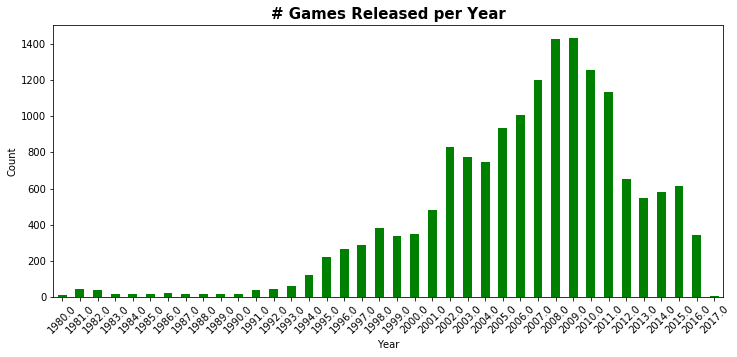

In [13]:
# Distribution of games over the years

fig, ax = plt.subplots(figsize=(12,5))

games_sold = vg.groupby("Year").count()["Rank"]

games_sold

games_sold.plot(kind="bar", rot=45,color="g")
plt.title("# Games Released per Year", fontdict={"fontsize":15, "fontweight":"bold"})
plt.xticks(np.arange(0, 38, 1))
plt.ylabel("Count")

plt.show()

### Insights
 - Peak years for game releases were between **2007 and 2008**

### Make sure the `Global_Sales` column is a sum of the other sale columns

In [14]:
check_global = abs(round(vg["Global_Sales"] - 
                         sum([vg["NA_Sales"], vg["EU_Sales"], vg["JP_Sales"], vg["Other_Sales"]]), 0))

# All answers should be close to 0
check_global[check_global != 0]

Series([], dtype: float64)

In [15]:
vg.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## Data Visualization

Since we now have a basic understanding of our data, let's build a few visuals (keeping in mind that the recipient of the visual is a publisher looking to improve sales). 


## 2. Who are the top publishers in each region?

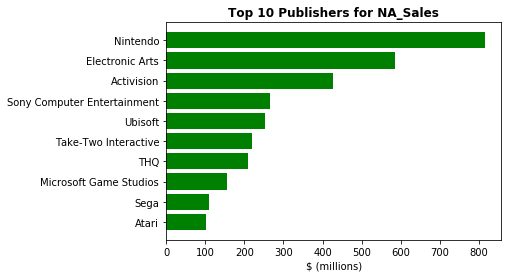

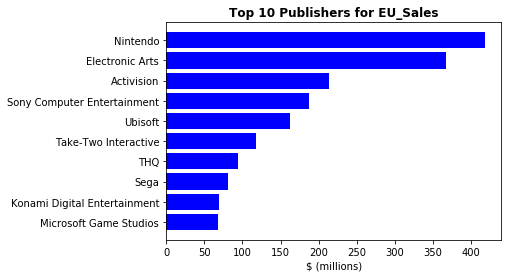

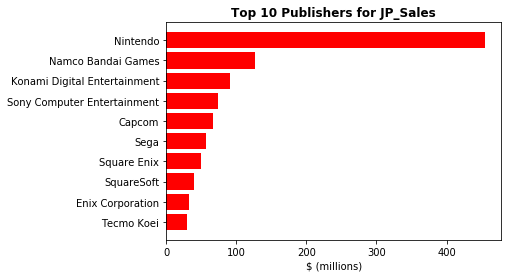

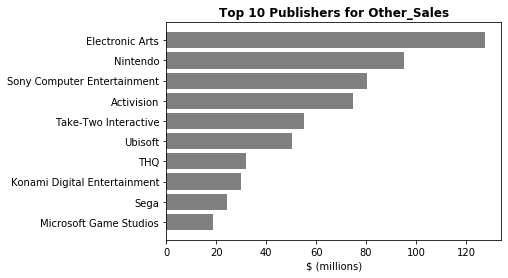

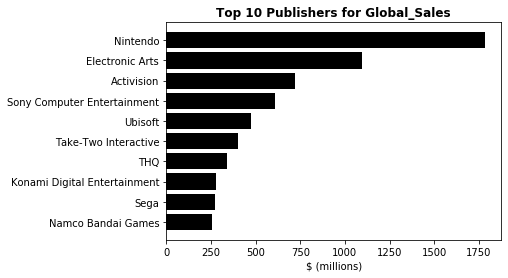

In [16]:
publisher = vg.groupby("Publisher").sum()

sale_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']
colors = ['g', 'b', 'r', 'grey', 'black']

for ix, col in enumerate(sale_cols):
    
    # We will graph the top 10 publishers in each region
    publisher_top10 = publisher.sort_values(by=col).tail(10)
    
    fig = plt.figure()
    x = publisher_top10.index
    y = publisher_top10[col]
    plt.barh(x, y, color=colors[ix])
    plt.title(f"Top 10 Publishers for {col}", fontdict={"fontsize":12, "fontweight":"bold"})
    plt.xlabel("$ (millions)")
    

### Results & Insights

With the 2 bar charts above, it will display the top 10 publishers, based on total sales, for that specific region. This way we can directly compare the top publishers in each region as they are not going to be the same across all regions.

We can infer that:
- Nintendo **dominates each region in sales**, besides the `Other_Sales`, being the **top publisher**
- Electronic Arts (EA) is 2nd in `Global_Sales`, but is not in the top 10 for `Japan_Sales`
- Nintendo `Global_Sales` =~ **\$1.8 billion**
- EA `Global_Sales` =~ **\$1.1 billion**
- Etc.

## 2a. Comparing the top publishers for 2 regions

In [17]:
# Creating the drop down
region = widgets.Dropdown(options=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"],
                          value="NA_Sales",
                          description='Region 1:',
)

# Creating the 2nd drop down
region2 = widgets.Dropdown(options=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"],
                           value="EU_Sales",
                           description='Region 2:'
)

def plot_bars(region, region2):
    
    publisher = vg.groupby("Publisher").sum().sort_values(by=region).tail(10)
    publisher2 = vg.groupby("Publisher").sum().sort_values(by=region2).tail(10)
    
    x = publisher.index
    y = publisher[region]
    
    x2 = publisher2.index
    y2 = publisher2[region2]
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,12))
    ax1.barh(x, y)
    ax1.set_title(f"Top 10 Publishers for {region}", fontdict={"fontsize":15, "fontweight":"bold"})
    ax1.set_xlabel("$ (millions)")
    
    ax2.barh(x2, y2, color='darkorange')
    ax2.set_title(f"Top 10 Publishers for {region2}", fontdict={"fontsize":15, "fontweight":"bold"})
    ax2.set_xlabel("$ (millions)")
    
    plt.show()
    
### End function
    

interactive(plot_bars, region=region, region2=region2)



interactive(children=(Dropdown(description='Region 1:', options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sa…

## 2b. Comparing 2 Publisher Sales for Each Region

In [18]:
# Drop down 1
publisher = widgets.Dropdown(options=vg['Publisher'].unique(),
                             value="Nintendo",
                             description='Publisher 1:',
)

# Drop down 2
publisher2 = widgets.Dropdown(options=vg['Publisher'].unique(),
                             value="Electronic Arts",
                             description='Publisher 2:',
)

def plot_bars(publisher, publisher2):
    
    p = vg.groupby("Publisher").sum().loc[publisher].drop(['Rank', 'Year'])
    p2 = vg.groupby("Publisher").sum().loc[publisher2].drop(['Rank', 'Year'])
    
    fig, ax = plt.subplots(1,1, figsize=(18,9))
    
    x = np.arange(5)
    width = 0.35
    
    ax.bar(x-width/2, p, width=width, label=publisher)
    ax.bar(x+width/2, p2, width=width, color='orange', label=publisher2)
    ax.set_title(f"{publisher} vs. {publisher2} Sales (millions)", fontdict={'fontsize':20, 'fontweight':'bold'})
    ax.set_xticks(x)
    ax.set_xticklabels(labels=p.index, fontdict={'fontsize':15})
    ax.set_ylabel("$ (millions)", fontdict={'fontsize':15})
    
    plt.legend(fontsize=15)
    plt.show()
    
### End function
    
interactive(plot_bars, publisher=publisher, publisher2=publisher2)
    

interactive(children=(Dropdown(description='Publisher 1:', options=('Nintendo', 'Microsoft Game Studios', 'Tak…


## 3. What are the most popular genres for each publisher?

Most popular will mean the most games released in this case.

In [19]:
# Top 10 publishers sorted by global sales
top10 = vg.groupby(['Publisher']).sum().sort_values(by='Global_Sales').tail(10).index

# Drop down 1
publisher = widgets.Dropdown(options=top10,
                             value="Nintendo",
                             description='Publisher 1:',
)

# Drop down 2
publisher2 = widgets.Dropdown(options=top10,
                             value="Electronic Arts",
                             description='Publisher 2:',
)

def plot_pies(publisher, publisher2):
    
    pub1 = vg[vg["Publisher"] == publisher]["Genre"].value_counts()
    pub2 = vg[vg["Publisher"] == publisher2]["Genre"].value_counts()
    
    pub1_labels = pub1.index
    pub2_labels = pub2.index
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
    ax1.pie(pub1, labels=pub1_labels, autopct='%1.2f%%')
    ax1.set_title(f"Genre % for {publisher}", fontdict={"fontsize":15, "fontweight":"bold"})
    
    ax2.pie(pub2, labels=pub2_labels, autopct='%1.2f%%')
    ax2.set_title(f"Genre % for {publisher2}", fontdict={"fontsize":15, "fontweight":"bold"})
    
    plt.show()
    
### End function  
    
interactive(plot_pies, publisher=publisher, publisher2=publisher2)

interactive(children=(Dropdown(description='Publisher 1:', index=9, options=('Namco Bandai Games', 'Sega', 'Ko…

### Results & Insights

With the 2 pie charts above, you can see what genres each publisher produces the most of. This way we can see compare which publishers have a wide genre selection and which don't.

We can infer that:
- `Sports` make up **41.37% of EA** games released
- `Platform`, `Role-Playing`, `Misc` make up **14-16% each for Nintendo**
- Etc.


## 4. Overview of Publisher Sales Over Time

Based on the publisher, we can look at the overall sales from their oldest game for global sales.

In [20]:
# Drop down
publisher = widgets.Dropdown(options=top10,
                             value="Nintendo",
                             description='Publisher 1:',
)

def publisher_time(publisher):
    
    pub1 = vg.groupby(['Publisher', 'Year']).sum().drop("Rank", axis=1).loc[publisher]
    
    # Year range for publisher 1
    pub1_y_min = int(min(pub1.index))
    pub1_y_max = int(max(pub1.index))
    
    regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(18,10))
    
    ax1.bar(pub1.index, pub1["Global_Sales"], color='purple')
    ax1.set_title(f"{publisher} Global Sales Over Time ({pub1_y_min}-{pub1_y_max})", 
                  fontdict={"fontsize":20, "fontweight":"bold"})
    ax1.set_ylabel("$ (millions)")
    
    
    ax2.plot(pub1[regions], label=pub1.columns)
    ax2.set_title(f"{publisher} Sales Over Time ({pub1_y_min}-{pub1_y_max})", 
                  fontdict={"fontsize":20, "fontweight":"bold"})
    ax2.set_ylabel("$ (millions)")
    ax2.legend(pub1.columns)
    
    plt.show()

### End function
    
interactive(publisher_time, publisher=publisher)

interactive(children=(Dropdown(description='Publisher 1:', index=9, options=('Namco Bandai Games', 'Sega', 'Ko…

### Results & Insights

With the bar graph and line graph above, you can see the total sales (globally and by each region) for a specific publisher. The reason why I broke up the global sales from the rest was because I believe the total sales is easier to understand when it wasn't compared to the other regions. Also, the sum of the other regions equates to global sales, I thought it made more sense to do so. What do you think?

We can infer that:
- The popularity of games started to pick up mid-late 2000's (based on the top publishers)
- `Nintendo` had the most sales in 2006. Upon further research, this was the year they released the Wii and DS Lite.
- We can see a general decline in sales post 2010
- Etc.

## 5. What are the most popular genres for each region?

In this case, we will define "most popular" by the genre yielding the most sales in each region.

In [21]:
# Creating the dropdown
# https://stackoverflow.com/questions/40467672/add-dropdown-list-and-text-box-in-matplotlib-and-show-plot-according-to-the-input
region = widgets.Dropdown(options=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"],
                          value="Global_Sales",
                          description='Region:',
)

## not sure what this does
## https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = round((pct*total/100.0),2)
        return '{:.2f}% ({:.2f})'.format(pct,val)
    return my_autopct
    

def plot_pie(region):
    """
    Graph a pie chart for vg, grouped by genre, to show total sales dependent on 
    region chosen in markdown.
    """
    genres = vg.groupby(["Genre"]).sum()
    x = genres[region].sort_values()
    labels = x.index
    
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot()
    
    patches, texts, autotexts = ax.pie(x,
                                       labels=labels,
                                       autopct=make_autopct(x), 
                                       textprops={'fontsize':12})
    for t in texts:
        t.set_horizontalalignment('center')
        
    plt.title(f"Sales (% and millions) by Genre for {region}", fontdict={"fontsize":22, "fontweight":"bold"})
    
    plt.show()
    
### End function
    
interactive(plot_pie, region=region)


interactive(children=(Dropdown(description='Region:', index=4, options=('NA_Sales', 'EU_Sales', 'JP_Sales', 'O…

### Results & Insights

For the pie chart above, we are able to select which region we would like to see the total sales (by genre).

- With this we can see that `Action` is the most popular game genre across NA, EU, Other, and Global Sales
- `Role-Playing` is the most popular genre in JP Sales, doubling JP's 2nd most popular genre, Action (350mil vs. 158mil)
- JP's least popular genre, `Shooting`, is among the top 3 genres in NA, EU, Other, and Global Sales
- Etc.




## 6. Which regions are correlated with which?

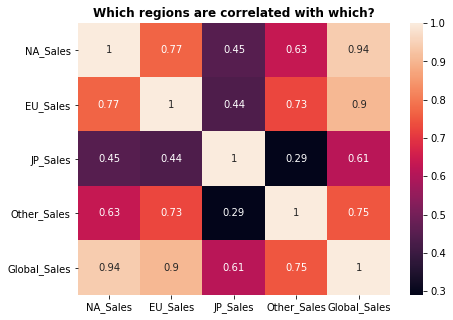

In [22]:
corr = vg.corr().drop(['Rank', 'Year']).drop(['Rank', 'Year'], axis=1)

fig = plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True)
plt.title("Which regions are correlated with which?", fontdict={'fontsize':12,
                                                                'fontweight':'bold'})

plt.show()

### Insights
- JP has weaker positive correlations with the other regions
- NA and EU have extremely strong positive correlations with Global sales


## 7. Most common words used in game titles for each genre

For this, we will build a word cloud. A word cloud basically counts the frequency of each unique word in a text and displays the most popular word as the biggest.

In [23]:
from wordcloud import WordCloud

genre = widgets.Dropdown(options=vg['Genre'].unique(),
                         value="Action",
                         description='Genre:',
)

def word_cloud(genre):
    
    # Specific genre
    df = vg[vg["Genre"] == genre]
    
    # Need to generate text list first
    # https://re-thought.com/creating-wordclouds-in-python/
    text = " ".join(name for name in df['Name'].astype(str))

    # Word cloud object
    wordcloud = WordCloud(width=1250, height=1000, background_color='white', max_words=100).generate(text)

    # Display the word cloud object
    fig = plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(f"Most Popular Words in the {genre} Game Titles",
              fontdict={"fontsize":20,
                        "fontweight":"bold"})
    plt.show()

    # How many words are there?
    print(f"There are {len(text)} unique words in the word cloud for {genre} games.")
    
### End function
    
interactive(word_cloud, genre=genre)

    


interactive(children=(Dropdown(description='Genre:', index=8, options=('Sports', 'Platform', 'Racing', 'Role-P…

### Results & Insights

With the word cloud above, we can see the top 100 words in the game titles for a specific genres. The purpose of this is to maybe see any reoccuring words in game titles in a specific genre to maybe gain inspiration for your own game or just to see the most popular games in each title.

We can infer that:
- `Fighting` genre - Dragon Ball Z, Street Fighter, and Mortal Combat are the most popular words
- `Action` genre - Star Wars, Legend, and Spiderman are the most popular words
- `Shooting` genre - Call and Tom Clancy are the most popular words (Tom Clancy is the creator of Ghost Recon)
- `Sports` genre - NBA, Madden NFL, NHL, and Pro Yakyuu (baseball in Japan) are the most popular words
- Etc.

## 8. What are the most popular platforms? & Total sales of the games per platform

We will count the frequency for each unique `Platform` to see which platform has the most available games. For the second graph, something to keep in mind is that the number represented is the **total sales of the games, NOT the console itself.**

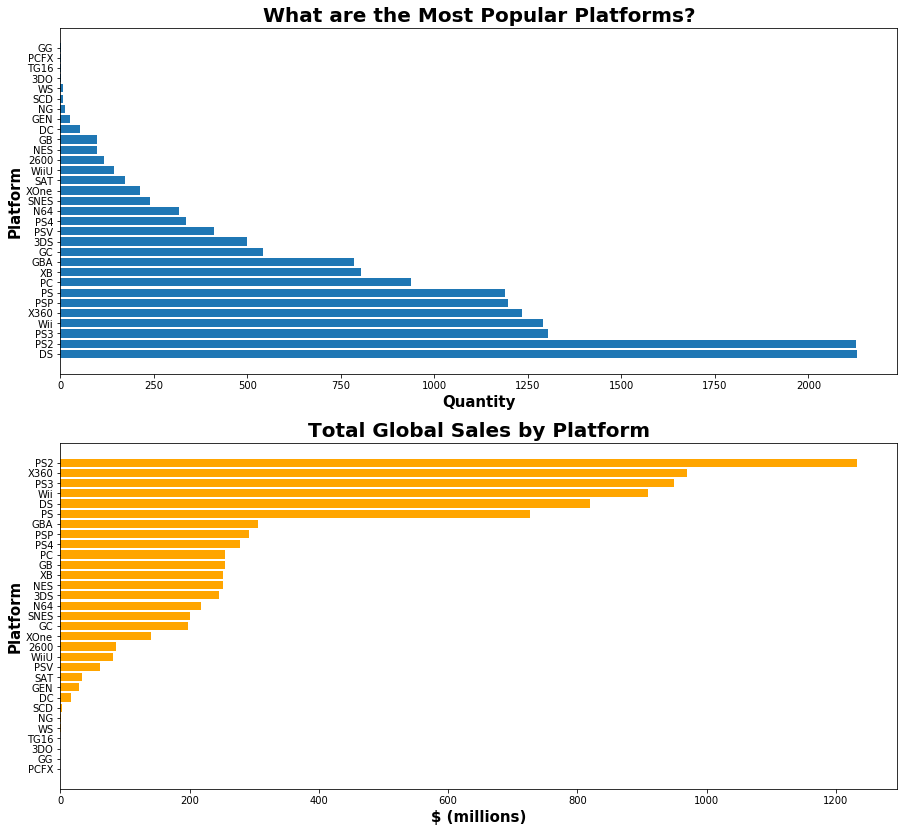

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,14))

# Most popular platforms graph
y = vg['Platform'].value_counts().index
x = vg['Platform'].value_counts()

ax1.barh(width=x, y=y)
ax1.set_title(f"What are the Most Popular Platforms?",
          fontdict={"fontsize":20,
                    "fontweight":"bold"})
ax1.set_xlabel("Quantity", fontdict={"fontsize":15,"fontweight":"bold"})
ax1.set_ylabel("Platform", fontdict={"fontsize":15,"fontweight":"bold"})

# Total Global Sales by Platform
platform_sales = vg.groupby('Platform').sum()['Global_Sales'].sort_values()

x2 = platform_sales.values
y2 = platform_sales.index

ax2.barh(width=x2, y=y2, color='orange')
ax2.set_title(f"Total Global Sales by Platform",
              fontdict={"fontsize":20,
                        "fontweight":"bold"})
ax2.set_xlabel("$ (millions)", fontdict={"fontsize":15,"fontweight":"bold"})
ax2.set_ylabel("Platform", fontdict={"fontsize":15,"fontweight":"bold"})

plt.show()


### Insights

From the graph above, you can see that:
- `DS` and `PS2` had the most games released, about 2250 games each
- `PS2` had the most global sales while `DS` ranked 5th
- `X360` was 5th in the most games released, but 2nd in total global sales
- Etc.

Top 5 in each graph

| Rank | Total Games Released | Total Global Sales |
| :--- | --- | --- |
| 1 | DS | PS2 |
| 2 | PS2 | X360 |
| 3 | PS3 | PS3 |
| 4 | Wii | Wii |
| 5 | X360 | DS |

## 9. Games Released by the Top Publisher for Each Year (1980 - 2017)

The reason I decided to use plotly.express was because I wanted the user to see the top publisher and the amount for each bar easily. So, I saw the hover feature (similar to Tableau) where it shows whatever value you input when you hover over a certain bar. 

This was my first time using plotly.express as I saw it being used more often compared to matplotlib.pyplot and never figured out why until now. Matplotlib.pyplot is 1 dimensional in a way (you can make it interactive, as you with my other graphs above) and plotly.express is a lot more dynamic.

In [25]:
import plotly.graph_objects as go 
import plotly.express as px 

# Games released by publisher per year
publisher_counts = vg.groupby(['Year', 'Publisher']).count()['Rank']

# idxmax() gets the row with the maximum value in the rank column
top_pub_games_released = publisher_counts[publisher_counts.groupby(level=0).idxmax()]

test = top_pub_games_released.reset_index().set_index("Year").rename({'Rank':'Quantity'}, axis=1)

px.bar(test,
       x=test.index,
       y=test.Quantity,
       hover_data=['Publisher', 'Quantity'], color='Quantity',
       title="Publishers that Released the Most Games Per Year (1980-2017)")

### Results and Insights

With the bar plot above, we can see the publisher that released the most games per year. For an example, for 2005, Electronic Arts released a total of 117 games. 

We can infer that:
- Electronic Arts released the most amount of games from 2001 to 2008
- There was a peak in games released in 2009, but it slowly declined after that (based on this dataset)
    - My assumption for this is that this was when we started to see more computer games be released vs. console games.
- Etc.

## 10. Top Publisher Based on Region Sales Per Year

Steps to build the visual
- group by year and publisher
- agg sum
- should return multiindex of year, publisher and the sum of the numeric columns
- drop the rank column
- plug into plotly express

In [26]:
publisher_sales = vg.groupby(['Year', 'Publisher']).sum().drop('Rank', axis=1)

# Keeping the row with the most global sales per year index
top_publisher_sales = publisher_sales.loc[publisher_sales['Global_Sales'].groupby(level=0).idxmax()]

# Resetting the index to access the publisher in the graph
top_publisher_sales = top_publisher_sales.reset_index().set_index('Year')

px.bar(top_publisher_sales,
       x=top_publisher_sales.index.get_level_values(level=0),
       y=top_publisher_sales['Global_Sales'],
       labels={'Global_Sales': '$ (millions)'},
       hover_data=['Publisher', 'Global_Sales'], color='Global_Sales',
       title='Top Publisher Based on Global Sales Per Year')

In [27]:
fig = go.Figure()

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

buttons = []
i = 0

# Graphing each region and showing 1 region on graph dependent on button click
for r in regions:
    
    # Keeping the row with the most region sales per year 
    top_publisher_sales = publisher_sales.loc[publisher_sales[r].groupby(level=0).idxmax()]

    # Resetting the index to access the publisher in the graph
    top_publisher_sales = top_publisher_sales.reset_index().set_index('Year')
    
    # Adding a bar graph per region
    fig.add_trace(go.Bar(x = top_publisher_sales.index.get_level_values(level=0),
                         y = top_publisher_sales[r],
                         marker = dict(color=top_publisher_sales[r], colorscale='viridis'),
                         hoverinfo = ['text'],
                         hovertext = top_publisher_sales['Publisher'],
                         name = r,
                         visible = (i==0)
                        )
                 )
    fig.update_layout(title_text = 'Top Publisher Based on Region Per Year')
    fig.update_yaxes(title="$ (million)")
    fig.update_xaxes(title='Year')
    
    
    # args is a list of booleans that tells the buttons which trace to show on click
    # I am not sure what this does
    # https://stackoverflow.com/questions/65710352/how-can-i-add-a-button-or-dropdown-in-a-plot-created-using-plotly-in-python
    args = [False] * len(regions)
    args[i] = True

    # Adding a button(referenced Ken Jee's notebook)
    button = dict(method='update',
                  label=r,
                  visible=True,
                  args=[{'visible':args}]
                 )
    buttons.append(button)
    
     # i is an iterable used to tell our "args" list which value to set to True
    i += 1
    

# For the dropdown to show, you need to create an updatemenu
updatemenu = [{}]

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# Add dropdown menu options to figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

In [28]:
# Check graph above
check = publisher_sales.reset_index()[publisher_sales.reset_index()['Year']==2006]
check[['Year','Publisher','EU_Sales']].sort_values(by='EU_Sales')

Year                    Publisher  EU_Sales
1186  2006.0       Zoo Digital Publishing      0.00
1107  2006.0                From Software      0.00
1108  2006.0                       Funsta      0.00
1109  2006.0                  GN Software      0.00
1156  2006.0            Sammy Corporation      0.00
...      ...                          ...       ...
1173  2006.0         Take-Two Interactive      5.61
1170  2006.0                          THQ      5.69
1159  2006.0  Sony Computer Entertainment     11.99
1102  2006.0              Electronic Arts     13.22
1146  2006.0                     Nintendo     60.35

[112 rows x 3 columns]

### Results & Insights

With the interactive bar graph above, we can see the top publisher per year based on the region.

We can infer that:
- Nintendo and Electronic Arts are the top publishers for majority of the years
- Nintendo had a very successful year in 2006 across all regions
- Etc.

## 11. Top 5 Games by Each Genre

In [29]:
# genre_games = vg.groupby(["Genre", "Name"]).sum().drop(['Rank', 'Year'], axis=1)

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
genres = vg['Genre'].unique()

buttons = []
i = 0

fig = go.Figure()
for g in genres:
    
    # Top 5 games in specified genre in NA_Sales
    top_game_sales = vg[vg['Genre'] == g].sort_values(by='NA_Sales', ascending=False).head(5)[['Name','NA_Sales']]
    
    fig.add_trace(go.Bar(x = top_game_sales['Name'],
                         y = top_game_sales['NA_Sales'],
                         marker = dict(color=top_game_sales['NA_Sales'], colorscale='viridis'),
                         name = g,
                         visible = (i==0)
                        )
                 )
    fig.update_layout(title_text = 'Top 5 Games for Each Genre')
    fig.update_yaxes(title="$ (million)")
    fig.update_xaxes(title='Games')
    
    args = [False] * len(genres)
    args[i] = True

    # Adding a button(referenced Ken Jee's notebook)
    button = dict(method='update',
                  label=g,
                  visible=True,
                  args=[{'visible':args}]
                 )
    buttons.append(button)
    
    i += 1
    
# For the dropdown to show, you need to create an updatemenu
updatemenu = [{}]

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# Add dropdown menu options to figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

### Results & Insights

With the graph above, we can see the top 5 games for the specified genre. Looking over each genre, you can see that Tetris, Assassin's Creed, and Grand Theft Auto V were in the top 5 games twice for the `Puzzle`, `Adventure`, `Action` genres respectively. This is because both games were released on 2-3 different platforms. 

We can infer that:
- Mario series has the most popular games in the `Platform` genre, taking up the top 5
- Mario Kart takes up 4 spots in the `Racing` Genre
- Pokemon series has the most popular games in the `Role-Playing` genre, taking up the top 5
- Duck Hunt was the most popular `Shooter` game (individually), Call of Duty taking up the next 4 spots
- Etc.

# Conclusion

In this project, we worked with video game sales that was scraped by a user on Kaggle and explored the data through visualizations. Throughout the notebook, we answered the following questions:

1. How many games were released per year?
- Based on sales, who are the top 10 publishers in each region?
    1. Compared the top 10 publishers’ sales for 2 regions
    - Compared 2 publishers’ sales for each region
- What are the most popular genres for each publisher?
- Dependent on the publisher, what are their sales over time?
- What are the most popular genres for each region?
- Are there any correlations with region sales?
- Dependent on the genre, what are the most common words used in game titles?
- Which platforms had the most video games available and the most video game sales?
- Per year, which publisher released the most games?
- Per year, which publisher had the most sales?
- What are the top 5 games for each genre?

The insights we found (not limited to) are:
- Peak years for game releases were between **2007 and 2008**
- Nintendo **dominates each region in sales**, besides the `Other_Sales`, being the **top publisher**
- Electronic Arts (EA) is 2nd in `Global_Sales`, but is not in the top 10 for `Japan_Sales`
- Nintendo `Global_Sales` =~ **\$1.8 billion**
- EA `Global_Sales` =~ **\$1.1 billion**
- `Sports` make up **41.37% of EA** games released
- `Platform`, `Role-Playing`, `Misc` make up **14-16% each for Nintendo**
- The popularity of games started to pick up mid-late 2000's (based on the top publishers)
- `Nintendo` had the most sales in 2006. Upon further research, this was the year they released the Wii and DS Lite.
- We can see a general decline in sales post 2010
- With this we can see that `Action` is the most popular game genre across NA, EU, Other, and Global Sales
- `Role-Playing` is the most popular genre in JP Sales, doubling JP's 2nd most popular genre, Action (350mil vs. 158mil)
- JP's least popular genre, `Shooting`, is among the top 3 genres in NA, EU, Other, and Global Sales
- JP has weaker positive correlations with the other regions
- NA and EU have extremely strong positive correlations with Global sales
- `Fighting` genre - Dragon Ball Z, Street Fighter, and Mortal Combat are the most popular words
- `Action` genre - Star Wars, Legend, and Spiderman are the most popular words
- `Shooting` genre - Call and Tom Clancy are the most popular words (Tom Clancy is the creator of Ghost Recon)
- `Sports` genre - NBA, Madden NFL, NHL, and Pro Yakyuu (baseball in Japan) are the most popular words
- `DS` and `PS2` had the most games released, about 2250 games each
- `PS2` had the most global sales while `DS` ranked 5th
- `X360` was 5th in the most games released, but 2nd in total global sales
- Electronic Arts released the most amount of games from 2001 to 2008
- There was a peak in games released in 2009, but it slowly declined after that (based on this dataset)
- Nintendo and Electronic Arts are the top publishers for majority of the years
- Nintendo had a very successful year in 2006 across all regions
- Mario series has the most popular games in the `Platform` genre, taking up the top 5
- Mario Kart takes up 4 spots in the `Racing` Genre
- Pokemon series has the most popular games in the `Role-Playing` genre, taking up the top 5
- Duck Hunt was the most popular `Shooter` game (individually), Call of Duty taking up the next 4 spots



**Thanks for reading through this notebook! Open to comments and suggestions :)**